In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

data = pd.read_csv('C:/Users/joao_/Desktop/4 ANO JOAO/SINO/VS CODE PROJETO/Datasets/bank-full-transformed.csv')

In [2]:
lst = [data]

for column in lst:
    column.loc[column["balance"] == -1,  'balance'] = "Saldo Negativo"
    column.loc[column["balance"] == 0,  'balance'] = "Entre 0 e 2500"
    column.loc[column["balance"] == 1,  'balance'] = "Entre 2500 e 5000"
    column.loc[column["balance"] == 2,  'balance'] = "Mais de 5000"

In [7]:
px.histogram(data, x="balance", color="balance") 

In [8]:
px.histogram(data, x="balance", color="y", barmode = 'group') 

In [9]:
balancey = pd.DataFrame(data.groupby('balance')['y'].sum()).reset_index()
balancey = balancey.sort_values(by = 'y', ascending = False)
fig = px.bar(balancey.iloc[:], #plotting only the top 20 Countries
             x = 'balance', y = 'y', title = 'Distribuição de Subscrição com Saldo Bancário')

fig.show()

In [14]:
count_job_response_pct = pd.crosstab(data['y'],data['balance']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

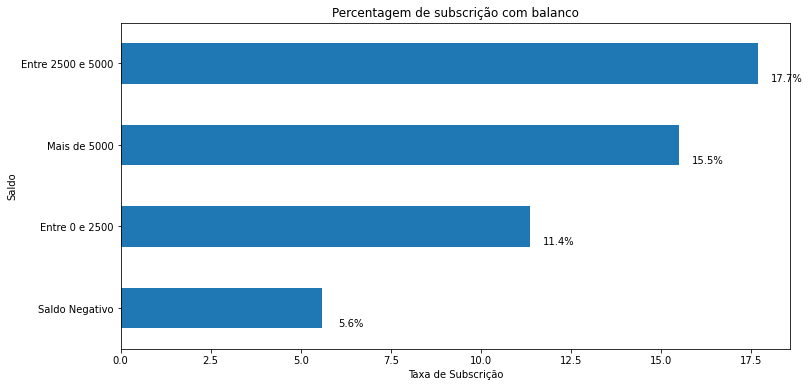

In [15]:
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))
                                                                               
plt.title('Percentagem de subscrição com balanco')
plt.xlabel('Taxa de Subscrição')
plt.ylabel('Saldo')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct[1].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [16]:
labels = data['balance'].value_counts().index
values = data['balance'].value_counts().values

fig = px.pie(data, values= values, names= labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='show')
fig.show()